In [1]:
# Ignore warnings in ipynb
import warnings
warnings.filterwarnings('ignore')


import os
from groundingdino.util.inference import load_model, load_image, predict, annotate
HOME=os.getcwd()

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

CONFIG_PATH = os.path.join(HOME, "groundingdino\config\GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))


from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)
print("DONE")

c:\git\other_coffeeML\coffeeML\GroundingDINO\weights\groundingdino_swint_ogc.pth ; exist: True
c:\git\other_coffeeML\coffeeML\GroundingDINO\groundingdino\config\GroundingDINO_SwinT_OGC.py ; exist: True
final text_encoder_type: bert-base-uncased
DONE


In [6]:
import os
import supervision as sv
import numpy as np
import torch
import random
device = torch.device("cpu")



IMAGE_PATH = os.path.join(os.getcwd(),'..\Coffee_photos\images\\1-50')
print(IMAGE_PATH)

TEXT_PROMPT = "coffee cup"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

for i in range(1):
    NEW_IMAGE_PATH = os.path.join(IMAGE_PATH,f"coffe_image({random.randint(1, 51)}).jpg")
    image_source, image = load_image(NEW_IMAGE_PATH)

    boxes, logits, phrases = predict(
        model=model, 
        image=image, 
        device=device,
        caption=TEXT_PROMPT, 
        box_threshold=BOX_TRESHOLD, 
        text_threshold=TEXT_TRESHOLD
    )
    print(boxes, logits, phrases)

    annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
    sv.plot_image(annotated_frame, (16, 16))

c:\git\other_coffeeML\coffeeML\GroundingDINO\..\Coffee_photos\images-50


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\coffe_image(23).jpg'

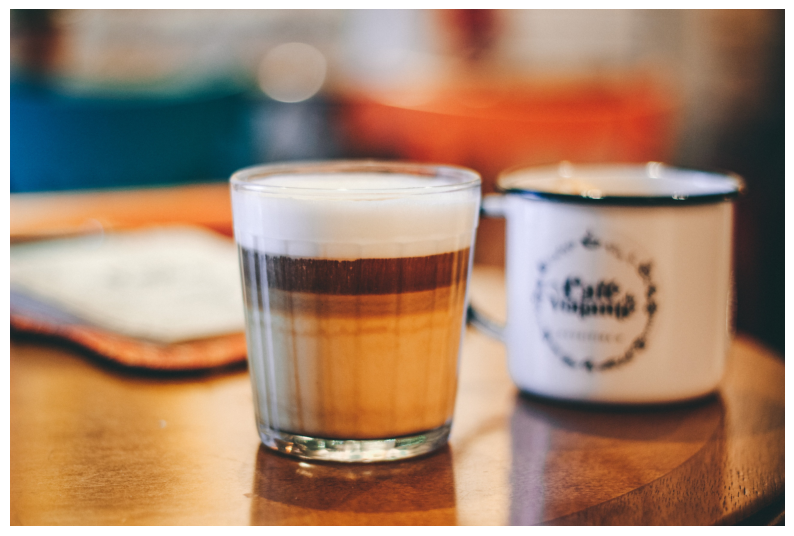

In [39]:
import os
import supervision as sv
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import cv2

# Assuming you have already defined the variables: boxes, image_source, and optionally phrases

# Load the image
NEW_IMAGE_PATH = os.path.join(IMAGE_PATH, f"coffee_image ({269}).jpg")
image_source, image = load_image(NEW_IMAGE_PATH)

# Create a copy of the image to draw bounding boxes without modifying the original image
image_with_boxes = np.copy(image_source)

# Draw bounding boxes and labels
for i, box in enumerate(boxes):
    x, y, width, height = box
    label = phrases[i]  # Use the label if available

    # Scale the coordinates back to the original image size
    x *= image.shape[1]
    y *= image.shape[0]
    width *= image.shape[1]
    height *= image.shape[0]

    x, y, width, height = int(x), int(y), int(width), int(height)

    color = (255, 0, 0)  # You can customize the color
    cv2.rectangle(image_with_boxes, (x, y), (x + width, y + height), color, 2)
    
    # Draw x and y coordinates near the top-left corner of the bounding box
    cv2.putText(image_with_boxes, f"x: {x}, y: {y}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    if label:
        cv2.putText(image_with_boxes, label, (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image with bounding boxes and coordinates
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()
